# Babel Stream benchmark

Results from Babel Stream benchmark.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
from pprint import pprint
from pathlib import Path

REPO_ROOT = str(Path(os.getcwd()).parent.parent.parent.parent)  # Repo root dir
REFRAME_ROOT = os.path.join(REPO_ROOT, 'reframe')  # ReFrame root dir
REFRAME_DEPS = os.path.join(REFRAME_ROOT, 'external')  # ReFrame dependencies
REPO_DEPS = os.path.join(REPO_ROOT, 'external')  # Repo dependencies
PERFLOG_DIR = os.path.join(REPO_ROOT, 'perflogs')  # Perflogs dir
sys.path.extend((REFRAME_ROOT, REPO_ROOT, REPO_DEPS, REFRAME_DEPS)) # the `modules` package imports `reframe` so need that in sys.modules

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import modules
from reframe_config import site_configuration

# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import ScalarFormatter
from IPython.display import display, HTML

In [3]:
import os, sys
from pprint import pprint
from pathlib import Path

REPO_ROOT = str(Path(os.getcwd()).parent.parent.parent.parent)  # Repo root dir
REFRAME_ROOT = os.path.join(REPO_ROOT, 'reframe')  # ReFrame root dir
REFRAME_DEPS = os.path.join(REFRAME_ROOT, 'external')  # ReFrame dependencies
REPO_DEPS = os.path.join(REPO_ROOT, 'external')  # Repo dependencies
PERFLOG_DIR = os.path.join(REPO_ROOT, 'perflogs')  # Perflogs dir
sys.path.extend((REFRAME_ROOT, REPO_ROOT, REPO_DEPS, REFRAME_DEPS)) # the `modules` package imports `reframe` so need that in sys.modules

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import modules
from reframe_config import site_configuration

# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import ScalarFormatter
from IPython.display import display, HTML

In [4]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

## Systems and their descriptions

The following table gives a high level overview of each partition defined in terms of architecture and configuration. The column `S:C:T` stands for **number of sockets**, **number of physical cores per socket** and **number of threads per core**. Similarly, the column `caches` indicate the cache sizes from lower to higher in kilobytes (KiB).

In [5]:
df = modules.utils.tabulate_partitions(root=PERFLOG_DIR)
display(HTML(df.transpose().to_html()))

## Array size

Babel Stream benchmark uses 3 arrays of size `N` to run different kernels. We use the total array
size of the benchmark in such a way that they occupy certain percentage of the system memory to avoid caching effects of the benchmark. This can be configured from the CLI using `-S mem_size` flag. Current default is 0.4, _i.e.,_ 40 % of system memory is used for arrays.

## Latest run performance metrics

All the performance metrics in `MB/s` are tabulated from the latest benchmark run for different systems/parititons and programming environments

In [6]:
df = modules.utils.tabulate_last_perf(test='BabelStreamTest*',
                                     root=PERFLOG_DIR,
                                     extras=['prg_model'])
df = df.transpose() # so now cols are all, single
df = df.sort_values(['case'])
display(df)

perf_var                                                              Add  \
case                                               prg_model                
cscs-daint:daint-gcc9-ompi4-ib-umod-gpu:babel-s... cuda        555450.064   
cscs-daint:daint-gcc9-ompi4-ib-umod-gpu:babel-s... omp          44601.224   
cscs-daint:daint-gcc9-ompi4-ib-umod-gpu:babel-s... tbb          44010.130   
grenoble-g5k:dahu-gcc9-ompi4-opa-umod:babel-str... omp         126272.553   
grenoble-g5k:dahu-icc21-impi21-opa-umod:babel-s... tbb          81286.024   
juwels-booster:booster-gcc9-ompi4-ib-umod-nvgpu... cuda       1398400.310   
juwels-booster:booster-gcc9-ompi4-ib-umod:babel... omp         158092.193   
juwels-cluster:batch-icc21-impi21-ib-umod:babel... tbb          81423.556   

perf_var                                                             Copy  \
case                                               prg_model                
cscs-daint:daint-gcc9-ompi4-ib-umod-gpu:babel-s... cuda        543026.648   
cscs-daint:daint-gcc9-ompi4-ib-umod-gpu:babel-s... omp          39136.874   
cscs-daint:daint-gcc9-ompi4-ib-umod-gpu:babel-s... tbb          38656.958   
grenoble-g5k:dahu-gcc9-ompi4-opa-umod:babel-str... omp         116990.439   
grenoble-g5k:dahu-icc21-impi21-opa-umod:babel-s... tbb          72190.932   
juwels-booster:booster-gcc9-ompi4-ib-umod-nvgpu... cuda       1391104.678   
juwels-booster:booster-gcc9-ompi4-ib-umod:babel... omp         151036.681   
juwels-cluster:batch-icc21-impi21-ib-umod:babel... tbb          62932.799   

perf_var                                                              Dot  \
case                                               prg_model                
cscs-daint:daint-gcc9-ompi4-ib-umod-gpu:babel-s... cuda        585131.425   
cscs-daint:daint-gcc9-ompi4-ib-umod-gpu:babel-s... omp          62226.684   
cscs-daint:daint-gcc9-ompi4-ib-umod-gpu:babel-s... tbb          61707.761   
grenoble-g5k:dahu-gcc9-ompi4-opa-umod:babel-str... omp         158796.061   
grenoble-g5k:dahu-icc21-impi21-opa-umod:babel-s... tbb         104798.670   
juwels-booster:booster-gcc9-ompi4-ib-umod-nvgpu... cuda       1325536.276   
juwels-booster:booster-gcc9-ompi4-ib-umod:babel... omp         132784.337   
juwels-cluster:batch-icc21-impi21-ib-umod:babel... tbb         113073.111   

perf_var                                                              Mul  \
case                                               prg_model                
cscs-daint:daint-gcc9-ompi4-ib-umod-gpu:babel-s... cuda        542988.432   
cscs-daint:daint-gcc9-ompi4-ib-umod-gpu:babel-s... omp          39087.694   
cscs-daint:daint-gcc9-ompi4-ib-umod-gpu:babel-s... tbb          38614.565   
grenoble-g5k:dahu-gcc9-ompi4-opa-umod:babel-str... omp         118970.681   
grenoble-g5k:dahu-icc21-impi21-opa-umod:babel-s... tbb          73170.291   
juwels-booster:booster-gcc9-ompi4-ib-umod-nvgpu... cuda       1389166.181   
juwels-booster:booster-gcc9-ompi4-ib-umod:babel... omp         121449.223   
juwels-cluster:batch-icc21-impi21-ib-umod:babel... tbb          59881.478   

perf_var                                                            Triad  
case                                               prg_model               
cscs-daint:daint-gcc9-ompi4-ib-umod-gpu:babel-s... cuda        556287.711  
cscs-daint:daint-gcc9-ompi4-ib-umod-gpu:babel-s... omp          44625.571  
cscs-daint:daint-gcc9-ompi4-ib-umod-gpu:babel-s... tbb          43921.384  
grenoble-g5k:dahu-gcc9-ompi4-opa-umod:babel-str... omp         124256.477  
grenoble-g5k:dahu-icc21-impi21-opa-umod:babel-s... tbb          82918.449  
juwels-booster:booster-gcc9-ompi4-ib-umod-nvgpu... cuda       1399039.062  
juwels-booster:booster-gcc9-ompi4-ib-umod:babel... omp         155228.718  
juwels-cluster:batch-icc21-impi21-ib-umod:babel... tbb          74168.042

## Performance History

The plot shows the **Triad bandwidths** for each system/partition/environment combination. The performance logs include a git reference (as a tag "git=<ref>") to refer the state of repository when the test was performed.

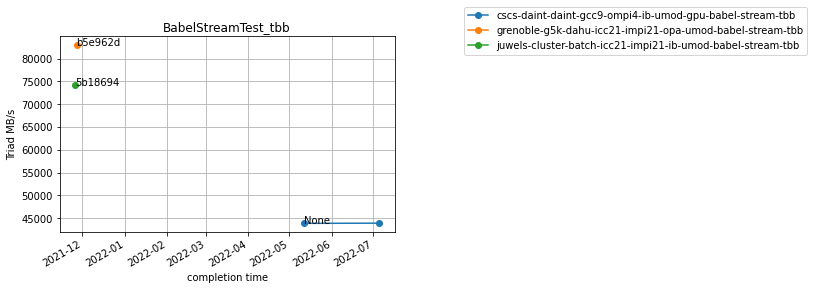

In [7]:
for model in ['omp', 'tbb', 'cuda']:
    test=f'BabelStreamTest_{model}'
    perf_records = modules.utils.load_perf_logs(root=PERFLOG_DIR, extras=[], test=test)
    if perf_records is None:
        print('%s: no performance logs found' % test)
    else:
        fig, ax = plt.subplots(nrows=1, ncols=1)
        for spe, data in perf_records.groupby(['sysname', 'partition', 'environ']):
            # filter to only Gflops records (might have others)
            data = data.loc[data['perf_var'] == 'Triad']
            data.plot(ax=ax, x='completion_time', y='perf_value', style=['o-'], label='-'.join(spe), legend=None)

            # annotate points with git_ref:
            for x, y, ref in zip(data['completion_time'], data['perf_value'], data['git']):
                if not pd.isnull(ref):
                    ax.annotate(ref[:7], (x, y))
        ax.set_title(test)
        ax.set_xlabel('completion time')
        ax.set_ylabel('Triad MB/s')
        handles, labels = ax.get_legend_handles_labels()
        ax.grid()
        fig.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left')

In [8]:
for model in ['omp', 'tbb', 'cuda']:
    test=f'BabelStreamTest_{model}'
    perf_records = modules.utils.load_perf_logs(root=PERFLOG_DIR, extras=[], test=test)
    if perf_records is None:
        print('%s: no performance logs found' % test)
    else:
        for spe, data in perf_records.groupby(['sysname', 'partition', 'environ']):
            # filter to only Gflops records (might have others)
            data = data.loc[data['perf_var'] == 'Triad']
            print(data)

      sysname                     partition           environ  \
3  cscs-daint  daint-gcc9-ompi4-ib-umod-gpu  babel-stream-omp   
8  cscs-daint  daint-gcc9-ompi4-ib-umod-gpu  babel-stream-omp   

                testname                   filename  \
3    BabelStreamTest_omp    BabelStreamTest_omp.log   
8  BabelStreamTest_omp_0  BabelStreamTest_omp_0.log   

                                                path  \
3  /home/manuel/Data/SSD/Code/SKA/ska-sdp-benchma...   
8  /home/manuel/Data/SSD/Code/SKA/ska-sdp-benchma...   

             completion_time               reframe  \
3  2022-05-11 08:29:40+02:00  reframe 3.10.0-dev.3   
8  2022-07-05 14:27:06+02:00        reframe 3.12.0   

                                                info     jobid  ... perf_unit  \
3  BabelStreamTest_omp on cscs-daint:daint-gcc9-o...  38343062  ...      MB/s   
8  BabelStreamTest %prg_model=omp %$repeat_no=0 @...  39694778  ...      MB/s   

                    perf_ref  \
3  ref=null (l=null, u=null)  